In [1]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib as mat
from matplotlib import pyplot as plt

Chance to hit:  90.878 %
Chance to ko if hit:  61.6785 %
Chance to ko real:  56.05218723000001 %
Chance to ko or down if hit:  82.38499999999999 %
Chance to ko or down real:  74.8698403 %
Chance to crit:  13.4555 %
average hit is: 9.345635
average injure is: 9.24118


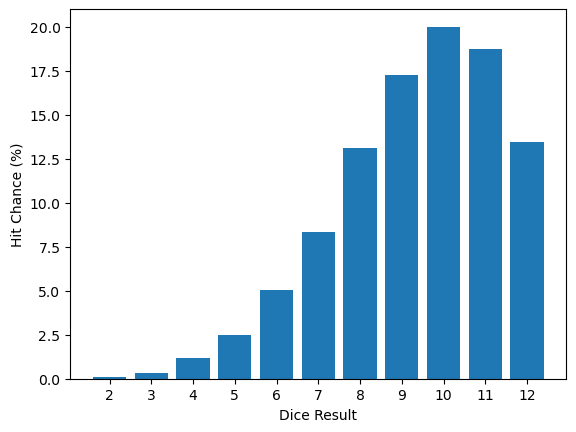

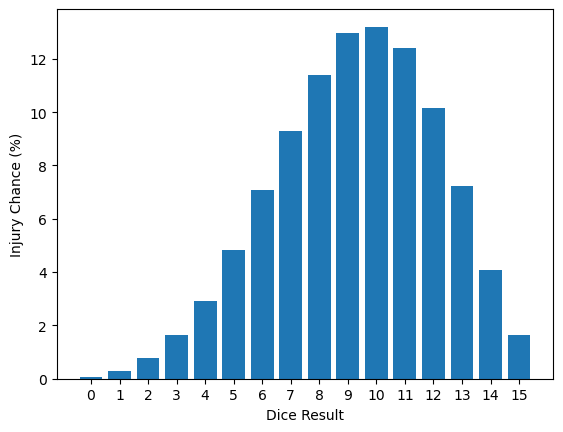

In [22]:
nda=4
ndi=4
aminus=False
iminus=False
aresults = []
iresults = []
adrops=nda-2
idrops=ndi-2
armor=3
bb=True
hit=[]
crit=[]
out=[]
down=[]
for i in range(200000):
    arolls =[]
    for k in range(nda):
        roll = random.randint(1,6)
        arolls.append(roll)
    while len(arolls) > 2:
        if aminus:
            arolls.remove(max(arolls))
        else:
            arolls.remove(min(arolls))
        
    irolls =[]
    for k in range(ndi):
        roll = random.randint(1,6)
        irolls.append(roll)
    if bb:
        #roll = random.randint(1,6)
        #irolls.append(roll)
        kdi=3
    else:
        kdi=2
    while len(irolls) > kdi:
        if iminus:
            irolls.remove(max(irolls))
        else:
            irolls.remove(min(irolls))
    
    s = sum(arolls)
    si = sum(irolls)-armor
    if si > 6 and si < 9:
        down.append(1)
    else:
        down.append(0)
    if si >=9:
        out.append(1)
    else:
        out.append(0)
    if s >=7:
        hit.append(1)
        if s >=12:
            crit.append(1)
        else:
            crit.append(0)
    else:
        hit.append(0)
        crit.append(0)
    #s -= min(rolls)
    aresults.append(s)
    iresults.append(si)

hper=np.mean(hit)
oper=np.mean(out)
dper=np.mean(down)
hoper = hper*oper
doro = dper+oper
hdoper = hper*doro
print('Chance to hit: ', hper*100, '%')
print('Chance to ko if hit: ', oper*100, '%')
print('Chance to ko real: ', hoper*100, '%')
print('Chance to ko or down if hit: ', doro*100, '%')
print('Chance to ko or down real: ', hdoper*100, '%')
print('Chance to crit: ', np.mean(crit)*100, '%')
print('average hit is:', np.mean(aresults))
print('average injure is:', np.mean(iresults))

die, co = np.unique(aresults, return_counts=True)
tot = sum(co)
pc=[]
for i in range(len(die)):
    pc.append(co[i]/tot*100)
#    print('% chance of', di[i], 'is', co[i]/tot*100, '%')
plt.bar(die,pc)
plt.xticks(die)
plt.xlabel('Dice Result')
plt.ylabel('Hit Chance (%)')
plt.show()
plt.close()

die, ci = np.unique(iresults, return_counts=True)
toti = sum(ci)
pci=[]
for i in range(len(die)):
    pci.append(ci[i]/toti*100)
plt.bar(die,pci)
plt.xticks(die)
plt.xlabel('Dice Result')
plt.ylabel('Injury Chance (%)')
plt.show()
plt.close()

average successes 3.16006
chance of working:  0.9709866666666667
chance of trigger:  0.5216866666666666


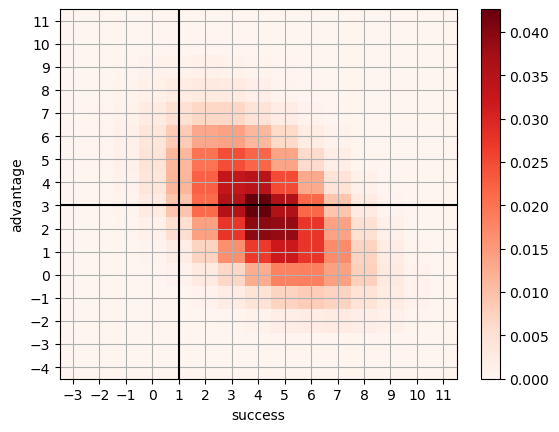

In [31]:
target_s=1
target_a=3
free_s=1
free_a=0
triumph=3
red=   [[1,0],[1,0],[1,triumph],[1,1],[1,1],[2,0],[2,0],[0,2],[0,2],[0,1],[0,1],[0,0]]
yellow=[[1,0],[1,0],[1,triumph],[1,1],[1,1],[1,1],[2,0],[2,0],[0,2],[0,2],[0,1],[0,0]]
purple=[[1,0],[1,1],[2,0],[0,2],[0,1],[0,1],[0,1],[0,0]]
green= [[1,0],[1,0],[1,1],[2,0],[0,2],[0,1],[0,1],[0,0]]
blue=  [[1,1],[1,0],[0,1],[0,2],[0,0],[0,0]]
black= [[1,0],[1,0],[0,1],[0,1],[0,0],[0,0]]

pn=2
ng=4
ny=2
nr=0
nk=0
nb=0
results=0
trials=150000
check=[]
extra=[]
trigger=[]
both=[]
for i in range(trials):
    fail=0
    success=0
    advantage=0
    threat=0
    for b in range(nb):
        pick=random.choice(blue)
        success += pick[0]
        advantage += pick[1]
    for g in range(ng):
        pick=random.choice(green)
        success += pick[0]
        advantage += pick[1]
    for y in range(ny):
        pick=random.choice(yellow)
        success += pick[0]
        advantage += pick[1]
    for k in range(nk):
        pick=random.choice(black)
        fail += pick[0]
        threat += pick[1]
    for p in range(pn):
        pick=random.choice(purple)
        fail += pick[0]
        threat += pick[1]
    for r in range(nr):
        pick=random.choice(red)
        fail += pick[0]
        threat += pick[1]
    results+=success-fail
    nsuc = success-fail+free_s
    res_a = advantage-threat+free_a
    if nsuc > 0:
        if res_a >= target_a:
            trigger.append(1)
        else:
            trigger.append(0)
        if nsuc >= target_s:
            check.append(1)
        else:
            check.append(0)
    else:
        trigger.append(0)
        check.append(0)
    both.append([nsuc,res_a])
results = results/trials
print('average successes', results)
chance=sum(check)/len(check)
tchance=sum(trigger)/len(trigger)
print('chance of working: ',chance)
print('chance of trigger: ',tchance)
both=np.array(both)
su = both[:,0]
ad = both[:,1]
xt = np.array(range(min(su), max(su)))
yt = np.array(range(min(ad), max(ad)))

xb=np.arange(min(su)-0.5,max(su),1)
yb=np.arange(min(ad)-0.5,max(ad),1)

plt.hist2d(su,ad,cmap='Reds',density=True,bins=[xb,yb])
plt.xlabel('success')
plt.ylabel('advantage')
plt.axvline(1,color='k')
plt.axhline(target_a,color='k')
plt.colorbar()
plt.xticks(ticks=xt)
plt.yticks(ticks=yt)
plt.grid()
plt.show()


In [61]:
lethal=4                 #reduce crit range max 1 allowed
customizable=2           #extra hard point  max 1 allowed
destructive=3            #extra damage      max 1 allowed
accurate=4               #max 3 allowed
vicious=2                #max 4 allowed
pierce=2


mmedge=pierce*2+lethal     #1 hp
sedge=vicious              #1 hp
balanced=accurate*2        #2 hp
cgrip=accurate             #1 hp 
superier=0                 #1 hp
mods=superier + mmedge + balanced + cgrip
tar='cut_wep'
if tar=='cut_wep':
    target_a=customizable + lethal + destructive + vicious*4 + accurate*3 + pierce*3 - mods
print(target_a)
target_a = customizable + pierce*2 #+ vicious*2
print(target_a)

15
6


In [4]:
target_number=15
d12 = [1,2,3,4,5,6,7,8,9,10,0,12]
d6 = [1,2,3,4,5,6]
npips=3
trials=150000
favored = True
weary=False
results = 0
for i in range(trials):
    if favored:
        for j in range(2):
            r1 = random.choice(d12)
            r2 = random.choice(d12)
            res = max(r1,r2)
    else:
        res = random.choice(d12)
    if res == 12:
        results+=1
    else:
        if weary:
            if res <=3:
                results += 0
            else:
                for i in range(npips):
                    res += random.choice(d6)
                if res >= target_number:
                    results += 1
                else:
                    results += 0
        else:
            for i in range(npips):
                res += random.choice(d6)
            if res >= target_number:
                results += 1
            else:
                results += 0

results = results/trials * 100
print('Chance of sucess with ', npips, 'pips with target number ', 15, ': ', results, '%')

Chance of sucess with  3 pips with target number  15 :  80.08466666666666 %


In [40]:
npips=2
wanted=1
d=6
def xsame(n,k,d=6):
    nck=math.comb(n,k)
    p=1/d
    r=nck*(p**k)*(1-p)**(n-k)
    return r
pr = 0
for i in range(wanted,npips+1):
    pr += xsame(npips,i,d=d)
print(pr)


0.3055555555555556
